In [1]:
import requests
from bs4 import BeautifulSoup
import re
import csv

# List of known incubators
incubators = [
    
    # Centralized information, listings, and news 
    {"name": "AfroTech", "url": "https://afrotech.com"},
    {"name": "BDPA Today", "url": "https://bdpatoday.com"},
    {"name": "Blackque247", "url": "https://www.blackque247.com"},
    {"name": "Black Enterprise - Technology", "url": "https://www.blackenterprise.com"},
    {"name": "Black Excellence - Business", "url": "https://blackexcellence.com"},
    {"name": "Black Founders Newsletter", "url": "http://blackfounders.com"},
    {"name": "Black Tech Mecca - Reports", "url": "https://www.blacktechmecca.org"},
    {"name": "Black Tech Unplugged", "url": "https://blacktechunplugged.com"},
    {"name": "Black Tech Women", "url": "https://medium.com/@BlackTechWomen"},
    {"name": "Black Wall Street", "url": "https://bws.ceoblognation.com"},
    {"name": "Black Women Talk Tech", "url": "https://www.blackwomentalktech.com"},
    {"name": "Blackledstartups", "url": "http://blackledstartups.com"},
    {"name": "Blacks in Technology", "url": "https://www.blacksintechnology.net"},
    {"name": "Blavity", "url": "https://blavity.com"},
    {"name": "Diversify Tech", "url": "https://diversifytech.co"},
    {"name": "For Colored Girls Who Tech", "url": "https://forcoloredgirlswhotech.substack.com"},
    {"name": "Good Black News", "url": "https://goodblacknews.org"},
    {"name": "GSVlabs", "url": "https://www.gsvlabs.com"},
    {"name": "Mogul Millennial", "url": "https://www.mogulmillennial.com"},
    {"name": "People of Color in Tech", "url": "https://peopleofcolorintech.com"},
    {"name": "Startup Digest Diversity, Equity & Inclusion", "url": "https://diversity.startupdigest.com"},
    {"name": "The Network Journal", "url": "https://tnj.com"},
    {"name": "ThePLUG", "url": "https://tpinsights.com"},
    {"name": "Urban Trendsetters", "url": "http://urbantrendsetters.com"},
    {"name": "UrbanGeekz", "url": "https://urbangeekz.com"},
    {"name": "Wearable Tech Ventures", "url": "http://www.wearabletechventures.org"},
    
    # Open, inclusive, beginner startup events 
    {"name": "#blackcomputeHER", "url": "https://blackcomputeher.org"},
    {"name": "A3C", "url": "https://a3cconference.com"},
    {"name": "AfroTech World", "url": "https://experience.afrotech.com"},
    {"name": "A Tribe Called Tech", "url": "https://atribecalledafrotech.splashthat.com"},
    {"name": "BDPA National Conference", "url": "https://www.bdpa2020.com"},
    {"name": "BITCon", "url": "https://bitcon.tech"},
    {"name": "BlackByte", "url": "https://www.blackbyte.tech"},
    {"name": "Black Designers Ignite", "url": "https://blackignite.com"},
    {"name": "Black is Tech Conference", "url": "http://blackistechconference.com"},
    {"name": "Black Tech for Black Lives", "url": "https://www.blacktechforblacklives.com"},
    {"name": "Black Tech Master Series", "url": "http://www.aasuconference.com"},
    {"name": "Black Technology Professional", "url": "https://www.meetup.com/Black-Technology-Professionals-BTP-NY"},
    {"name": "Black Tech NOLA", "url": "https://blacktechnola.com"},
    {"name": "BlackTech Meetup", "url": "http://blacktechmeetup.org"},
    {"name": "BlackTech Miami", "url": "https://www.meetup.com/BlackTech-Miami"},
    {"name": "Blacktech Week", "url": "http://blacktechweek.com"},
    {"name": "Black Wall Street: Homecoming", "url": "https://bwshomecoming.com"},
    {"name": "Black Women Talk Tech", "url": "https://www.blackwomentalktech.com"},
    {"name": "Data 4 Black Lives Conference", "url": "https://d4bl.org"},
    {"name": "Entrepreneur Accelerator Summit", "url": "http://www.bccelerator.com"},
    {"name": "Graveti Summit", "url": "https://gravetisummit.splashthat.com"},
    {"name": "MiTECH", "url": "https://www.meetup.com/MiTECH"},
    {"name": "MogulCon", "url": "https://www.mogulcon.com"},
    {"name": "NBMBAA Conference", "url": "https://nbmbaa.org"},
    {"name": "NOVELDAY", "url": "http://www.novelday.org"},
    {"name": "T.H.E. Summit", "url": "https://thestateofblacktech.com"},
    {"name": "Mass Challenge", "url": "https://masschallenge.org"},
    {"name": "Tech Inclusion", "url": "https://techinclusion.co"},
    {"name": "TechFam", "url": "https://www.meetup.com/TechFam"},
    {"name": "Tech: To Elevate Color in Hiring", "url": "https://www.meetup.com/TECH-To-Elevate-Color-in-Hiring-A-series-by-Betterment"},
    {"name": "Texas Black Expo", "url": "http://texasblackexpo.com"},
    {"name": "The Codette Project", "url": "https://www.thecodetteproject.com"},
    {"name": "The State of Black Design", "url": "https://www.eventbrite.com/e/the-state-of-black-design-tickets-115969603205"},
    {"name": "Women of Power Tech Conference", "url": "https://womenofpowertech.blackenterprise.com"},
    
    # Beginner knowledge-sharing events 
    {"name": "BLK hack", "url": "https://www.meetup.com/BLK-hack"},
    {"name": "1 Million Cups", "url": "https://www.1millioncups.com"},
    {"name": "ATL BlackTech", "url": "https://www.atlblacktech.com"},
    {"name": "bccelerator", "url": "http://www.bccelerator.com"},
    {"name": "Black Blockchain: New York", "url": "https://www.meetup.com/Black-Blockchain-New-York"},
    {"name": "Black Female Founders", "url": "https://www.blackfemalefounders.org"},
    {"name": "Black Founders", "url": "http://blackfounders.com"},
    {"name": "Black in Tech: Food and Hacking", "url": "https://www.meetup.com/Black-In-Tech-Food-and-Hacking"},
    {"name": "Black Tech Columbus", "url": "https://blacktechcolumbus.com"},
    {"name": "Black Tech Link", "url": "https://www.meetup.com/blacktechlink"},
    {"name": "Black Tech Matters", "url": "https://www.blacktechmatters.co"},
    {"name": "Black Tech Nation", "url": "https://blacktechnation.com"},
    {"name": "Blacks in Technology", "url": "https://www.blacksintechnology.net"},
    {"name": "Blacks in Technology: Dallas", "url": "https://www.meetup.com/Blacks-in-Technology-Dallas"},
    {"name": "Blacks in Technology: Los Angeles", "url": "https://www.meetup.com/Blacks-In-Technology-Los-Angeles"},
    {"name": "Blacks in Technology: Washington, DC", "url": "https://www.meetup.com/Washington-Information-Technology-Meetup"},
    {"name": "Blogalicious", "url": "http://beblogalicious.com"},
    {"name": "Chicago Blacks in Technology", "url": "https://www.meetup.com/Blacks-in-Technology-Chicago"},
    {"name": "Cincinnati Blacks In Technology Meetup", "url": "https://www.meetup.com/Cincinnati-Blacks-In-Technology-Meetup"},
    {"name": "Crebul", "url": "https://crebul.com"},
    {"name": "ImBlackInTech", "url": "https://imblackintech.com"},
    {"name": "Knox St. Studios", "url": "https://www.meetup.com/Knox-St-Studios"},
    {"name": "Minority Programmers Association", "url": "https://minorityprogrammers.org"},
    {"name": "Novel City Chamber of Innovation", "url": "http://www.novelcitychamber.com"},
    {"name": "PDX Blacks in Technology Meetup", "url": "https://www.meetup.com/PDX-Blacks-in-Technology-Meetup"},
    {"name": "Philly Startup Leaders", "url": "https://www.phillystartupleaders.org"},
    {"name": "Startup Founder 101", "url": "https://www.meetup.com/topics/founder-institute"},
    {"name": "Startup Grind", "url": "https://www.startupgrind.com"},
    {"name": "TECHQUITY", "url": "https://www.techquity.mn/about"},
    {"name": "The Black Mastermind Group", "url": "https://www.meetup.com/The-Black-Mastermind-Group"},
    {"name": "Roxbury Innovation Center", "url": "https://roxburyinnovationcenter.org/programs"},
    
    # Skill & Idea development organizations
    {"name": "devcolor", "url": "https://www.devcolor.org"},
    {"name": "Ada Developers Academy", "url": "https://adadevelopersacademy.org"},
    {"name": "Alchemy Code Lab", "url": "https://www.alchemycodelab.com"},
    {"name": "All Star Code", "url": "https://www.allstarcode.org"},
    {"name": "American Underground", "url": "https://www.americanunderground.com"},
    {"name": "Ayoo Africa Tech DC", "url": "https://www.meetup.com/AfroTechDC"},
    {"name": "Baltimore Black Entrepreneurs & Startup Founders", "url": "https://www.meetup.com/Baltimore-Black-Entrepreneurs-Startup-Founders"},
    {"name": "Bccelerator", "url": "http://www.bccelerator.com/eas"},
    {"name": "Black and Brown Founders", "url": "https://blackandbrownfounders.com"},
    {"name": "Black Code Collective", "url": "https://www.meetup.com/Black-Code-Collective"},
    {"name": "Black Girls Code", "url": "https://www.blackgirlscode.com"},
    {"name": "Black Men Code", "url": "https://www.meetup.com/Black-Men-Code"},
    {"name": "Black Tech Boston", "url": "https://www.meetup.com/Black-Tech-Boston"},
    {"name": "Black Technologist", "url": "https://www.meetup.com/Black-Technologist"},
    {"name": "BLKTECHCLT", "url": "https://blktechinteractive.com"},
    {"name": "BLUE1647", "url": "https://www.blue1647.com"},
    {"name": "Careers in Code", "url": "https://careersincode.org"},
    {"name": "City Startup Labs", "url": "https://citystartuplabs.com"},
    {"name": "Claim Academy", "url": "https://claimacademystl.com"},
    {"name": "Code Fellows", "url": "https://www.codefellows.org/diversity-scholarship-fund"},
    {"name": "NSBETechstars", "url": "http://www.nsbe.org"},
    {"name": "Code2040", "url": "http://www.code2040.org"},
    {"name": "Coding Dojo", "url": "https://www.codingdojo.com"},
    {"name": "Columbia HBCU Fellowship", "url": "https://sps.columbia.edu/ideas-impact/future-work/columbia-hbcu-fellowship"},
    {"name": "DevLeague", "url": "https://www.devleague.com"},
    {"name": "DevPoint Labs", "url": "https://www.devpointlabs.com"},
    {"name": "DigitalCrafts", "url": "https://www.digitalcrafts.com"},
    {"name": "Founder Institute Black Founder Fellowship", "url": "https://fi.co"},
    {"name": "Fullstack Academy", "url": "https://www.fullstackacademy.com"},
    {"name": "Galvanize", "url": "https://www.galvanize.com"},
    {"name": "General Assembly", "url": "https://generalassemb.ly"},
    {"name": "Grand Circus", "url": "https://www.grandcircus.co"},
    {"name": "Hack Reactor", "url": "https://www.hackreactor.com"},
    {"name": "Hackbright Academy", "url": "https://hackbrightacademy.com"},
    {"name": "Kal Academy", "url": "https://www.kalacademy.org"},
    {"name": "Launch Academy", "url": "https://launchacademy.com"},
    {"name": "Lean Startup Machine", "url": "https://www.leanstartupmachine.com"},
    {"name": "Metis", "url": "https://www.thisismetis.com"},
    {"name": "Millennial Entrepreneurs Redefined", "url": "http://millennialsredefined.org"},
    {"name": "MORTAR", "url": "https://wearemortar.com"},
    {"name": "Nation of Makers", "url": "https://www.nationofmakers.us"},
    {"name": "National BDPA", "url": "https://www.bdpa.org"},
    {"name": "National Coalition of 100 Black Women", "url": "https://ncbw.org"},
    {"name": "New Relic Bootcamp Diversity Scholarship", "url": "http://try.bloc.io"},
    {"name": "NOLAVATE Black", "url": "http://nolavateblack.com"},
    {"name": "Novel Professionals Accelerator", "url": "http://www.novelprofessionals.com"},
    {"name": "Philly Tech Sistas", "url": "https://www.meetup.com/Philly-Tech-Sistas"},
    {"name": "Pivot Technology School", "url": "https://www.pivottechschool.com"},
    {"name": "PowerMoves Bootcamp", "url": "http://www.powermovesusa.org"},
    {"name": "SEED SPOT", "url": "https://seedspot.org"},
    {"name": "She Means Business Incubator", "url": "https://shemeansbusinessincubator.com"},
    {"name": "StartupBus Advancing Black Entrepreneurs", "url": "https://startupbus.com"},
    {"name": "Startup Institute", "url": "https://www.startupinstitute.com"},
    {"name": "Tech Diversified", "url": "https://www.meetup.com/Tech-Diversified"},
    {"name": "Tech Elevator", "url": "https://www.techelevator.com"},
    {"name": "The Black Upstart", "url": "https://www.theblackupstart.com"},
    {"name": "The Hidden Genius Project", "url": "http://www.hiddengeniusproject.org"},
    {"name": "Trep House", "url": "https://www.trep.house"},
    {"name": "We Build Black", "url": "https://www.webuildblack.com"},
    {"name": "We Can Code IT", "url": "https://wecancodeit.org"},
    
    # Resources that facilitate early-stage recruitment and cofounder matching
    {"name": "Atlanta Minorities in Technology", "url": "https://www.meetup.com/ATLANTA-MINORITIES-IN-TECHNOLOGY"},
    {"name": "Bay Area Black Designers", "url": "https://www.meetup.com/Bay-Area-Black-Designers"},
    {"name": "Birmingham Black Techies", "url": "https://www.meetup.com/Birmingham-Black-Techies"},
    {"name": "Black Business Association", "url": "http://www.bbala.org"},
    {"name": "Black Business Women Rock", "url": "https://www.blackbusinesswomenrock.com"},
    {"name": "Black Career Women's lo Network", "url": "https://bcwnetwork.com"},
    {"name": "Black Connect", "url": "https://blackconnect.com"},
    {"name": "Atlanta Minorities in Technology", "url": "https://www.meetup.com/ATLANTA-MINORITIES-IN-TECHNOLOGY"},
    {"name": "Bay Area Black Designers", "url": "https://www.meetup.com/Bay-Area-Black-Designers"},
    {"name": "Birmingham Black Techies", "url": "https://www.meetup.com/Birmingham-Black-Techies"},
    {"name": "Black Business Association", "url": "http://www.bbala.org"},
    {"name": "Black Business Women Rock", "url": "https://www.blackbusinesswomenrock.com"},
    {"name": "Black Career Women's Network", "url": "https://bcwnetwork.com"},
    {"name": "Black Connect", "url": "https://blackconnect.com"},
    {"name": "Black Founders of San Francisco Bay Area", "url": "https://www.meetup.com/BlackFounders"},
    {"name": "Black in Tech STL", "url": "https://www.meetup.com/Black-In-Tech-STL-Meetup-Group"},
    {"name": "Black Professionals In Tech Network", "url": "https://www.meetup.com/Black-Professionals-In-Tech-Network-BPTN"},
    {"name": "Black Professionals Network", "url": "https://mybpnetwork.org"},
    {"name": "Black Tech Talent", "url": "https://www.blacktechtalent.org"},
    {"name": "Black Women in Technology: LA", "url": "https://www.meetup.com/Black-Women-in-Technology"},
    {"name": "Blerd – Black Nerds in Colorado", "url": "https://www.meetup.com/blerd-colorado"},
    {"name": "Boston Young Black Professionals", "url": "https://www.bostonybp.com"},
    {"name": "CoFoundersLab", "url": "https://cofounderslab.com"},
    {"name": "Detroit Black Tech", "url": "https://www.meetup.com/detroit-black-tech"},
    {"name": "Founder2be", "url": "https://www.founder2be.com"},
    {"name": "FounderDating", "url": "http://founderdating.com"},
    {"name": "National Black MBA Association", "url": "https://nbmbaa.org"},
    {"name": "National Society of Black Engineers", "url": "https://www.nsbe.org"},
    {"name": "NYC Black Designers", "url": "https://www.meetup.com/Black-Designers-in-Tech-NYC"},
    {"name": "Ohio Black Entrepreneurs Network", "url": "https://www.meetup.com/Cleveland-Black-Entrepreneurs-Network"},
    {"name": "Organization of Black Designers", "url": "http://obd.org"},
    {"name": "Saint Louis Black Entrepreneurs Meetup", "url": "https://www.meetup.com/Saint-Louis-Black-Entrepreneurs-Meetup"},
    {"name": "Silicon Beach Diversity", "url": "https://www.meetup.com/Silicon-Beach-Diversity"},
    {"name": "South Florida Black Professionals Network", "url": "https://sfbpnetwork.com/"},
    {"name": "STL Professionals & Entrepreneurs of African Diaspora Meetup", "url": "https://www.meetup.com/Saint-Louis-Minority-Professionals-Meetup"},
    {"name": "TechCofounder", "url": "http://techcofounder.com"},
    {"name": "Technologists of Color", "url": "https://www.meetup.com/Technologists"},
    {"name": "Tribe Called T.E.C.H.", "url": "http://www.blacktechunion.com"},
    {"name": "Valence.community", "url": "https://valence.community"},
    
    # Hackathons
    {"name": "BE Smart Hackathon", "url": "https://www.blackenterprise.com/the-2019-be-smart-hackathon-hbcus"},
    {"name": "Black Developers Meetup", "url": "https://www.meetup.com/blackdevelopers"},
    {"name": "Black Girls Code Hackathon", "url": "http://www.blackgirlscode.com"},
    {"name": "Black Lives Matter Hackathon", "url": "https://blacklivesmatter.devpost.com"},
    {"name": "Black Orlando Tech", "url": "https://www.meetup.com/Black-Orlando-Tech-BOT"},
    {"name": "Blackspace", "url": "http://theblackspace.org"},
    {"name": "Coding in Color", "url": "https://www.meetup.com/Coding_in_Color"},
    {"name": "Columbia DivHacks", "url": "http://columbiadivhacks.com"},
    {"name": "Frauvis Low Code Hackathon", "url": "https://www.eventbrite.com/e/frauvis-low-code-hackathon-build-for-us-build-for-the-community-tickets-111927377800"},
    {"name": "Hack Excellence: HBCU Hackathon Edition", "url": "https://www.eventbrite.com/e/hack-excellence-hbcu-hackathon-edition-tickets-111967905018"},
    {"name": "Hack for Justice Hackathon", "url": "https://www.hackthegap.com/hack-for-justice"},
    {"name": "Hack the Gap", "url": "https://www.hackthegap.com"},
    {"name": "Hack Diversity", "url": "https://hackdiversity.com"},
    {"name": "HBCU Computer Science Department Chairs Hackathon", "url": "https://www.bdpa2020.com/hbcu-hackathon"},
    {"name": "iD8 Hackathon", "url": "https://www.id8create.org"},
    {"name": "LA Makerspace", "url": "https://lamakerspace.org"},
    {"name": "MBKHEALTH Hackathon", "url": "https://www.qeyno.com"},
    {"name": "National Day of Civic Hacking", "url": "https://www.codeforamerica.org/events/national-day-of-civic-hacking-2020"},
    
    # Workspaces
    {"name": "All In Coworking of Inglewood", "url": "https://www.inglewoodcoworking.com"},
    {"name": "Bamboo Detroit", "url": "https://www.bamboodetroit.com"},
    {"name": "Black Dot Seattle", "url": "http://www.blackdotseattle.com"},
    {"name": "Black Tech Union", "url": "http://www.blacktechunion.com"},
    {"name": "Blackbird House", "url": "https://www.blackbird.house"},
    {"name": "Blue Lacuna", "url": "https://www.thebluelacuna.com"},
    {"name": "Business Lounge Dallas", "url": "https://www.businessloungedallas.com"},
    {"name": "C3 Lab", "url": "https://www.c3-lab.com"},
    {"name": "CAMPspace", "url": "http://www.campworkspace.com"},
    {"name": "Catalyst Spaces", "url": "http://www.catalystspaces.com"},
    {"name": "Clout Workspace", "url": "https://clout.space"},
    {"name": "Coalition Space", "url": "https://coalitionspace.com"},
    {"name": "CoWork Street", "url": "https://coworkstreet.com"},
    {"name": "Creative Colony", "url": "https://www.creativecolonyspaces.com"},
    {"name": "Creative Workspace HBA", "url": "https://creativeworkspacehba.com"},
    {"name": "Dream Village", "url": "https://www.dreamvillage.com"},
    {"name": "EcoTech Visions", "url": "https://ecotechvisions.com"},
    {"name": "Equal Space", "url": "http://www.equalspace.co"},
    {"name": "Ethels Club", "url": "https://www.ethelsclub.com"},
    {"name": "Evolve Oakland", "url": "https://evolveoakland.com"},
    {"name": "Femology", "url": "https://www.femology.com"},
    {"name": "Highlander Accelerator", "url": "http://highlanderomaha.com"},
    {"name": "IO SPACES", "url": "https://iospaces.com"},
    {"name": "Impact Hub", "url": "https://impacthub.net"},
    {"name": "Inclusive Innovation Incubator", "url": "https://www.in3dc.com"},
    {"name": "Input Lofts", "url": "http://inputlofts.com"},
    {"name": "LA Create Space", "url": "https://www.lacreatespace.com"},
    {"name": "Locale Workspace", "url": "http://www.localeworkspace.com"},
    {"name": "MLK Center Indy", "url": "https://mlkcenterindy.org"},
    {"name": "New Women Space", "url": "https://www.newwomenspace.com"},
    {"name": "Oakstop", "url": "http://oakstop.com"},
    {"name": "Opportunity Hub", "url": "https://opportunityhub.co"},
    {"name": "OSC Tech Lab", "url": "https://osctechlab.com"},
    {"name": "Perfect Office", "url": "https://goperfectoffice.com"},
    {"name": "Russell Center for Innovation and Entrepreneurship", "url": "https://rcie.org"},
    {"name": "Second Shift Chicago", "url": "https://www.secondshiftchicago.com"},
    {"name": "Space Called Tribe", "url": "https://www.spacecalledtribe.com"},
    {"name": "SpaceLab Detroit", "url": "https://spacelabdetroit.com"},
    {"name": "Station Loft Works", "url": "https://www.stationloftworks.com"},
    {"name": "Synergy Coworking", "url": "http://www.synergymadison.com"},
    {"name": "TechSquare Labs", "url": "https://techsquare.co"},
    {"name": "THE COMPOUND", "url": "https://www.thecompoundcowork.com"},
    {"name": "The Cube", "url": "https://www.thecubecowork.com"},
    {"name": "The Gathering Spot", "url": "https://thegatheringspot.club"},
    {"name": "The Harlem Collective", "url": "https://www.theharlemcollective.co"},
    {"name": "The Lab Nashville", "url": "http://thelabnashville.com"},
    {"name": "The Startup Nest", "url": "https://thestartupnest.com"},
    {"name": "The Urban Collective", "url": "http://theurbancollectivect.com"},
    {"name": "TILA Studios", "url": "https://www.tilastudios.com"},
    {"name": "Vector 90", "url": "https://www.vector90.com"},
    {"name": "WeWork", "url": "https://www.wework.com"},
    {"name": "Work Evolution", "url": "https://www.workevolution.co"},
    {"name": "Zora's House", "url": "https://zorashouse.com"},
    
    # Incubators/Accelerators
    
    {"name": "Black Innovation Alliance", "url": "https://blackinnovationalliance.com"},
    {"name": "Fearless Fund", "url": "https://fearless.fund"},
    {"name": "Harlem Capital", "url": "https://harlem.capital"},
    {"name": "Zane Venture Fund", "url": "https://zane.vc"},
    {"name": "Black Ambition", "url": "https://blackambitionprize.com"},
    {"name": "The Enterprise Center", "url": "https://www.theenterprisecenter.com"},
    {"name": "National Urban League", "url": "https://nul.org"},
    {"name": "Digital Undivided", "url": "https://digitalundivided.com"},
    {"name": "Impact Ventures", "url": "https://impact-ventures.co"},
    {"name": "Backstage Capital", "url": "https://backstagecapital.com"},
    {"name": "Y Combinator", "url": "https://www.ycombinator.com"},
    {"name": "Techstars", "url": "https://www.techstars.com"},
    {"name": "Mass Challenge", "url": "https://masschallenge.org"},
    {"name": "SOSV", "url": "https://sosv.com"},
    {"name": "PlugandPlayTechCentre", "url": "https://www.plugandplaytechcenter.com"},
    {"name": "Innovation Works", "url": "https://www.innovationworks.org"},
    {"name": "Start X", "url": "https://web.startx.com"},
    {"name": "AngelPad", "url": "https://www.angelpad.com"},
    {"name": "Google Startup", "url": "https://startup.google.com"},
    {"name": "Vilcap", "url": "https://vilcap.com"},
    
    {"name": "Bantunium Labs", "url": "https://bantunium.com"},
    {"name": "Bayou City Lab", "url": "https://www.bayoucitylab.com"},
    {"name": "Black Dot", "url": "http://www.blackdotseattle.com"},
    {"name": "Black Founders Exchange", "url": "https://www.americanunderground.com/black-founders-exchange"},
    {"name": "Catapult", "url": "https://circlespgh.org"},
    {"name": "Chicago Urban League Center for Entrepreneurship", "url": "https://www.chiurbanleaguecei.com"},
    {"name": "City Startup Labs", "url": "https://citystartuplabs.com"},
    {"name": "Code2040", "url": "http://www.code2040.org"},
    {"name": "digitalundivided", "url": "https://www.digitalundivided.com/programs"},
    {"name": "Early Growth", "url": "https://earlygrowthfinancialservices.com"},
    {"name": "Google for Startups", "url": "https://startup.google.com"},
    {"name": "Harbor CDC", "url": "https://harborcdc.org"},
    {"name": "Halcyon", "url": "https://halcyonhouse.org"},
    {"name": "Inclusive Innovation Incubator", "url": "https://www.in3dc.com"},
    {"name": "Incubator Without Walls", "url": "https://www.ledcmetro.org/futurebaltimore"},
    {"name": "Minority Cannabis Incubator", "url": "https://minoritycannabisincubator.org"},
    {"name": "Morehouse Innovation & Entrepreneurship Center", "url": "http://www.mcecenter.com"},
    {"name": "Renaissance Entrepreneurship Center", "url": "https://www.rencenter.org"},
    {"name": "SMAART Incubator", "url": "https://www.meetup.com/SMAART-INCUBATOR"},
    
    {"name": "Shaw University Innovation and Entrepreneurship Center", "url": "https://www.shawu.edu/InnovationCenter"},
    {"name": "StartUP FIU Procurement", "url": "https://startup.fiu.edu/procurement"},
    {"name": "The Bronzeville Incubator", "url": "http://www.thebronzevilleincubator.com"},
    {"name": "The Hood Incubator", "url": "https://www.hoodincubator.org"},
    {"name": "The Startup Nest", "url": "https://thestartupnest.com"},
    {"name": "The Urban Incubator", "url": "https://www.laul.org/incubator"},
    {"name": "Youngstown Business Incubator", "url": "https://ybi.org/mbac"},
    {"name": "500 Startups", "url": "https://500.co"},
    {"name": "1863 Ventures Pipeline", "url": "https://1863ventures.net/pipeline"},
    {"name": "1871", "url": "https://1871.com"},
    {"name": "Bronze Valley Accelerator", "url": "https://bronzevalley.com"},
    {"name": "Cincinnati Chamber Minority Business Accelerator", "url": "https://www.cincinnatichamber.com/the-inclusive-chamber/minority-business-accelerator"},
    {"name": "CONNECT ALL @ the Jacobs Center", "url": "https://www.connectallsd.org"},
    {"name": "DivInc", "url": "https://www.divinc.org"},
    {"name": "Dreamit", "url": "https://www.dreamit.com"},
    {"name": "Founder Gym", "url": "https://foundergym.com"},
    {"name": "FundBlackFounders", "url": "https://fundblackfounders.com"},
    {"name": "Greenville Chamber Minority Business Accelerator", "url": "https://www.greenvillechamber.org/mba"},
    {"name": "Hillman Accelerator", "url": "https://www.hill7.org"},
    {"name": "Impact Ventures Startup Accelerator", "url": "https://impact-ventures.co/2019/09/02/impact-accelerator-2"},
    
    {"name": "KiwiTech", "url": "https://www.kiwitech.com"},
    {"name": "MVP Accelerator", "url": "http://www.mvpaccelerator.com"},
    {"name": "MWBE Accelerator", "url": "https://igniteuny.com/mwbe"},
    {"name": "NewME", "url": "https://www.newme.in"},
    {"name": "Nex Cubed, HBCU Founders Program", "url": "https://nex3.com/hbcu"},
    {"name": "Opportunity Hub Entrepreneurship Accelerator", "url": "https://opportunityhub.co"},
    {"name": "Plug and Play Tech Center", "url": "https://www.plugandplaytechcenter.com/detroit"},
    {"name": "PowerMoves", "url": "http://www.powermovesusa.org"},
    {"name": "Rocky Mountain MicroFinance", "url": "https://www.rmmfi.org"},
    {"name": "Sistahbiz Global Network", "url": "https://www.sistah.biz"},
    {"name": "Smarter in the City", "url": "https://www.smarterinthecity.com"},
    {"name": "Startup52", "url": "http://startup52.com"},
    {"name": "Tampa Bay Chamber Minority Business Accelerator", "url": "https://www.tampabaychamber.com/involvement/minority-business-accelerator.aspx"},
    {"name": "Techstars", "url": "http://diversity.techstars.com/foundation"},
    {"name": "The Farm Accelerator", "url": "https://thefarmatl.com"},
    {"name": "Tumml", "url": "http://www.tumml.org"},
    {"name": "Vertical 404 Accelerator", "url": "https://vertical404.com/accelerator"},
    {"name": "Y Combinator", "url": "hhttps://www.ycombinator.com"},
    {"name": "Angel Investment Network", "url": "https://www.angelinvestmentnetwork.us"},
    {"name": "Black Angel Tech Fund", "url": "https://www.blackangeltechfund.com"},
    
    {"name": "Black Angels Miami", "url": "https://www.blackangels.miami"},
    {"name": "BLCK VC", "url": "https://www.blckvc.com"},
    {"name": "Culture Shift Weekend", "url": "https://www.cultureshiftingweekends.com"},
    {"name": "Impact America Fund", "url": "http://www.impactamericafund.com"},
    {"name": "LA Black Investors Club", "url": "https://www.lablackinvestorsclub.org"},
    {"name": "Pipeline Angels", "url": "https://pipelineangels.com"},
    {"name": "Portfolia", "url": "https://www.portfolia.co"},
    {"name": "Startup Angels", "url": "https://startupangels.com"},
    {"name": "Transparent Collective", "url": "http://www.transparentcollective.com"}, 
    {"name": "Black Business Residency", "url": "https://www.somersethouse.org.uk"},
    {"name": "Black Valley", "url": "https://www.blackvalley.co.uk"},
    {"name": "Barclays Eagle Lab", "url": "https://labs.uk.barclays"},
    {"name": "Diversity Business Incubator", "url": "https://www.dbi.org.uk"},
    {"name": "Digital Catapult", "url": "https://www.digicatapult.org.uk"},
    {"name": "techSPARK", "url": "https://techspark.co"},
    {"name": "Barclays Group", "url": "https://home.barclays"},
    {"name": "Innovate UK", "url": "https://iuk-business-connect.org.uk"},
    {"name": "Colorintech", "url": "https://www.colorintech.org"},
    {"name": "Hatch Enterprise", "url": "https://hatchenterprise.org"},
    
    {"name": "Sainsbury", "url": "https://www.about.sainsburys.co.uk"},
    {"name": "Birimian Ventures", "url": "https://birimianventures.com"},
    {"name": "ROOM", "url": "https://roommentoring.com"},
    {"name": "African Fashion Foundation", "url": "https://africanfashionfoundation.org"}, 
    {"name": "AcceleratorApp Limited", "url": "https://www.acceleratorapp.co"},
    {"name": "LeadLoft", "url": "https://www.leadloft.com"},
    {"name": "Enterprise Nation", "url": "https://www.enterprisenation.com"},
    {"name": "Movemeback", "url": "https://www.movemeback.com"},
    {"name": "The Creative Industries", "url": "https://www.thecreativeindustries.com"},
    {"name": "Birmingham Tech", "url": "https://www.birmingham.tech"},
    {"name": "Mercia", "url": "https://www.mercia.co.uk"},
    {"name": "Bamboocowork", "url": "https://www.bamboocowork.com"},
    {"name": "Purposeful Group", "url": "https://www.purposefulgroup.com"},
    {"name": "Women in Tech Network", "url": "https://www.womentech.net"},
    {"name": "UK Black Business Week", "url": "https://www.ukblackbusinessweek.uk"},
    {"name": "Somerset House", "url": "https://www.somersethouse.org"},
    {"name": "Startups of London", "url": "https://www.startupsoflondon.com"},
    {"name": "Harlem Capital Partners", "url": "https://www.harlem.capital"},
     
    {"name": "Seed Ambition", "url": "https://www.seedambition.com"},
    {"name": "Dorchester Industries Experimental Design Lab", "url": "https://www.pradagroup.com"},
    {"name": "The Black Fashion Accelerator", "url": "https://afropunk.com"},
    {"name": "Sovereignty", "url": "https://sov-er-eign-ty.com"},     
    {"name": "Natwest", "url": "https://www.natwest.com"},
    {"name": "Bruntwood SciTech", "url": "https://bruntwood.co.uk"},
    {"name": "Forward Accelerator", "url": "https://becleaps.co.uk"},
    {"name": "Betaden", "url": "https://www.beta-den.com"},
    {"name": "B Start-up", "url": "https://www.birmingham.ac.uk"},
    {"name": "5 Spring", "url": "https://www.wm5g.org.uk"},
    {"name": "Spark", "url": "https://www.sparkspace.co.uk"},
    {"name": "PocZero", "url": "https://poczero.com"},
    {"name": "BeSeen", "url": "https://b-seen.biz"},  
    {"name": "Start Smart CEE", "url": "https://www.startsmartcee.org"},
    {"name": "The Black Economic Alliance", "url": "https://www.thebea.co"},
    {"name": "Impact X Capital Partners", "url": "https://www.impactxcapital.com"},
    {"name": "Foundervine", "url": "https://www.foundervine.com"},
    {"name": "Black Business Network", "url": "https://www.blackbusinessnetwork.com"},
    {"name": "Black South West Network", "url": "https://www.blacksouthwestnetwork.com"},
    {"name": "Baltic Ventures", "url": "https://www.balticventures.uk"},
  
    {"name": "NatWest Group", "url": "https://www.natwest.com"},
    {"name": "Black Entrepreneurs and Businesses of Canada Society", "url": "https://www.blackentrepreneursbc.org"},
    {"name": "Black Entrepreneurship Through Acquisition Incubator", "url": "https://betaicanada.org"},
    {"name": "Black Opportunity Fund", "url": "https://www.blackopportunityfund.ca"},
    {"name": "Black Founders Network", "url":"https://www.entrepreneurs.utoronto.ca"},
    {"name": "BlackNorth Initiative", "url": "https://www.blacknorth.ca"},
    {"name": "Black Innovation Programs", "url": "https://www.dmc.torontomu.ca"},
    {"name": "MaRS Discovery District", "url": "https://www.marsdd.com"},
    {"name": "Tribe Network's Black Start-up Project", "url": "https://www.tribenetwork.ca"},
    {"name": "Black Busines Association of 50k","url": "https//www.africatechfestival.com"},
    {"name": "Engine Innovator Programme", "url": "https://www.theiaengine.com"},
    {"name": "The BioHub", "url": "https://www.birminghamresearchpark.co.uk"},
    {"name": "Technology Developer Accelerator Programme", "url": "https://www.apcuk.co.uk"},
    {"name": "STREAM House", "url": "https://steamhouse.org.uk"},
    {"name": "Warwick Ventures", "url":"https://warwick.ac.uk"},
    {"name": "Ignite Incubator", "url": "https://www.warwicksciencepark.co.uk"},
    {"name": "BCIMO", "url": "https://bcimo.co.uk"},
    {"name": "Ateta", "url": "https://www.birmingham.ac.uk"},
    {"name": "GBSLEP Growth Hub", "url": "https://www.gbslepgrowthhub.co.uk"},
    {"name": "SuperTech WM", "url": "https://www.supertechwm.com"},
    
    {"name": "CW Growth Hub", "url": "https://www.cwgrowthhub.co.uk"},
    {"name": "Innovation Alliance", "url": "https://innovationwm.co.uk"},
    {"name": "Aston Programme for Small Business Growth", "url": "https://www.aston.ac.uk"},
    {"name": "Energy Systems Catapult", "url": "https://es.catapult.org.uk"},
    {"name": "Manufacturing Technology Centre", "url":"https://www.the-mtc.org"},
    {"name": "WMAHSN", "url": "https://www.healthinnovationwestmidlands.org"},
    {"name": "Technology Supply Chain", "url": "https://www.technologysupplychain.co.uk"},
    {"name": "Enterprise Nation", "url": "https://www.enterprisenation.com"},
    {"name": "Tech Nation", "url": "https://technation.io"},
    {"name": "Tech UK","url": "https://www.techuk.org"},
    {"name": "BCU Advantage", "url": "https://bcuadvantage.co.uk"},
    {"name": "Black Country Growth Hub", "url": "https://uktin.net"},
    {"name": "UK BlackTech", "url": "https://ukblacktech.com"},
    {"name": "Medilink West Midlands", "url": "https://www.medilinkmidlands.com"},     
    {"name": "Envision", "url": "https://www.envisionaccelerator.com"},
    {"name": "Accenture", "url": "https://www.accenture.com"},
    {"name": "TechStars", "url": "https://www.techstars.com"},
    {"name": "Latimer House", "url": "https://www.latimerhouse.vc"},
    {"name": "Black Equity Organisation", "url": "https://blackequityorg.com"},
    {"name": "AWS Impact Accelerator", "url": "https://aws-startup-lofts.com"},
    {"name": "Nesta Accelerator Programme", "url": "https://www.nesta.org.uk"},
    {"name": "Female Founder Programme", "url": "https://www.nesta.org.uk"},
     
     
    
     
     # Growth Accelerators/Consulting firms
    {"name": "Accenture", "url": "https://www.accenture.com"},
    {"name": "Accion", "url": "https://www.accion.org"},
    {"name": "Bain & Company", "url": "https://www.bain.com"},
    {"name": "BearingPoint", "url": "https://www.bearingpoint.com"},
    {"name": "Booz Allen Hamilton", "url": "https://www.boozallen.com"},
    {"name": "Boston Consulting Group", "url": "https://www.bcg.com"},
    {"name": "Capgemini", "url": "https://www.capgemini.com"},
    {"name": "Deloitte", "url": "https://www2.deloitte.com"},
    {"name": "Ernst & Young", "url": "https://www.ey.com"},
    {"name": "FTI Consulting", "url": "https://www.fticonsulting.com"},
    {"name": "Gartner", "url": "https://www.gartner.com"},
    {"name": "Grant Thornton", "url": "https://www.grantthornton.com"},
    {"name": "Hercorner", "url": "https://hercorner.org"},
    {"name": "IMG Consulting", "url": "https://www.consultimg.com"},
    {"name": "Kantar", "url": "https://www.kantar.com"},
    {"name": "Kearney", "url": "https://www.kearney.com"},
    {"name": "KPMG", "url": "https://home.kpmg"},
    {"name": "L.E.K. Consulting", "url": "https://www.lek.com"},
    {"name": "McKinsey & Company", "url": "https://www.mckinsey.com"},
    {"name": "Mercer", "url": "https://www.mercer.com"},
    {"name": "North Highland", "url": "https://www.northhighland.com"},
    {"name": "Oliver Wyman", "url": "https://www.oliverwyman.com"},
    {"name": "Protiviti", "url": "https://www.protiviti.com"},
    {"name": "PwC", "url": "https://www.pwc.com"},
    {"name": "Roland Berger", "url": "https://www.rolandberger.com"},
    {"name": "Royal Consulting Firm", "url": "http://www.royalconsultingfirm.com"},
    {"name": "Tata Consultancy Services", "url": "https://www.tcs.com"},
    {"name": "The Barthwell Group", "url": "https://www.barthwellgroup.com"},
    
]

# Keywords for NLP-based searches
keywords = {
    "mentorship": [
        "mentorship", "mentor", "coaching", "guidance", "advisory support", 
        "business coach", "entrepreneurial guidance", "mentoring program", "advisory board"
    ],
    "funding": [
        "funding", "investment", "grants", "seed funding", "venture capital", 
        "angel investment", "capital raising", "financial support", "funding opportunities", "microloans"
    ],
    "networking": [
        "networking", "connections", "events", "meetups", "business relationships", 
        "entrepreneurial networking", "peer-to-peer collaboration", "business linkages", "partnership events"
    ],
    "workshops": [
        "workshop", "training", "skill development", "seminar", "educational session", 
        "business training", "professional development", "capacity building", "learning programs"
    ],
    "sector_specific": [
        "sector-specific", "industry-focused", "niche markets", "specialized programs", 
        "tailored industries", "industry-centric", "targeted sectors", "domain-specific"
    ],
    "legal_guidance": [
        "legal", "compliance", "financial advice", "business law", "regulatory support", 
        "tax guidance", "intellectual property", "contract review", "corporate law", "legal support"
    ],
    "innovation": [
        "innovation", "platform", "technology hub", "incubation", "prototype development", 
        "startup ecosystem", "digital innovation", "tech support", "creative solutions", "R&D support"
    ],
    "global_reach": [
        "global access", "international", "market access", "global expansion", "foreign markets", 
        "cross-border opportunities", "export support", "worldwide", "international reach"
    ],
    "partnerships": [
        "partnership", "collaboration", "corporate support", "alliances", "business partnerships", 
        "corporate alliances", "industry collaborations", "strategic partnerships", "institutional backing"
    ],
}



# NLP-based function to check for keywords
def check_feature(soup_text, feature_keywords):
    for keyword in feature_keywords:
        if re.search(rf"\b{keyword}\b", soup_text, re.IGNORECASE):
            return "Yes"
    return "No"

# Function to extract country location
# def extract_location(soup):
#     # Search common patterns for location/address
#     location_patterns = [
#         r'\b[A-Z][a-z]+\s+[A-Z][a-z]+(?:,\s+[A-Z]{2,3})?',  # City, State/Country format
#         r'\b[A-Z][a-z]+,\s+[A-Z]{2,3}',                    # City, Country abbreviation
#     ]
#     contact_section = soup.find("footer") or soup.find("body")  # Focus on footer or page body
#     if contact_section:
#         text = contact_section.get_text(separator=" ", strip=True)
#         for pattern in location_patterns:
#             match = re.search(pattern, text)
#             if match:
#                 return match.group()
#     return "Unknown"

# Initialize results list
results = []

# Scrape each incubator
for incubator in incubators:
    try:
        response = requests.get(incubator['url'], headers={"User-Agent": "Mozilla/5.0"})
        soup = BeautifulSoup(response.text, 'html.parser')
        soup_text = soup.get_text(separator=" ", strip=True).lower()
        
        # Extract features using NLP logic
        mentorship = check_feature(soup_text, keywords["mentorship"])
        funding = check_feature(soup_text, keywords["funding"])
        networking = check_feature(soup_text, keywords["networking"])
        workshops = check_feature(soup_text, keywords["workshops"])
        sector_specific = check_feature(soup_text, keywords["sector_specific"])
        legal_guidance = check_feature(soup_text, keywords["legal_guidance"])
        innovation = check_feature(soup_text, keywords["innovation"])
        global_reach = check_feature(soup_text, keywords["global_reach"])
        partnerships = check_feature(soup_text, keywords["partnerships"])
        
        # Extract location dynamically
#         country_location = extract_location(soup)
        
        # Append data to results
        results.append({
            "Incubator Name": incubator['name'],
            "URL": incubator['url'],
            "Mentorship Programs": mentorship,
            "Funding Opportunities": funding,
            "Networking Events": networking,
            "Workshops and Training": workshops,
            "Sector-Specific Programs": sector_specific,
            "Legal and Financial Guidance": legal_guidance,
            "Innovation Platforms": innovation,
            "Global Reach and Market Access": global_reach,
            "Partnerships with Corporations": partnerships,
        })

    except Exception as e:
        print(f"Error scraping {incubator['name']}: {e}")

# Save results to CSV
output_file = "black_business_support_incubators.csv" # you can label yours black_business_support_incubators1 etc
with open(output_file, "w", newline="", encoding="utf-8") as csvfile:
    fieldnames = [
        "Incubator Name", "URL", "Mentorship Programs", 
        "Funding Opportunities", "Networking Events", "Workshops and Training",
        "Sector-Specific Programs", "Legal and Financial Guidance", 
        "Innovation Platforms", "Global Reach and Market Access", 
        "Partnerships with Corporations"
    ]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)

print(f"Scraping complete! Data saved to {output_file}")

Error scraping Blackledstartups: HTTPConnectionPool(host='blackledstartups.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe75d1b3fd0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
Error scraping GSVlabs: HTTPSConnectionPool(host='www.gsvlabs.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe75d1cf130>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
Error scraping Startup Digest Diversity, Equity & Inclusion: HTTPSConnectionPool(host='diversity.startupdigest.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe75c77bbb0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
Error scraping BDPA National Confe

Error scraping MLK Center Indy: HTTPSConnectionPool(host='mlkcenterindy.org', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe75c7e5330>: Failed to establish a new connection: [Errno 61] Connection refused'))
Error scraping The Enterprise Center: HTTPSConnectionPool(host='www.theenterprisecenter.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe75c6df1c0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Error scraping Minority Cannabis Incubator: HTTPSConnectionPool(host='minoritycannabisincubator.org', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fe75db22080>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
Error scraping 500 Startups: HTTPSConnectionPool(host='500.co', port=443):

In [85]:
import pandas as pd

incubators_df = pd.read_csv("black_business_support_incubators.csv")
incubators_df.head(10)

,Incubator Name,URL,Mentorship Programs,Funding Opportunities,Networking Events,Workshops and Training,Sector-Specific Programs,Legal and Financial Guidance,Innovation Platforms,Global Reach and Market Access,Partnerships with Corporations
0,AfroTech,https://afrotech.com,Yes,No,Yes,Yes,No,No,Yes,No,No
1,BDPA Today,https://bdpatoday.com,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes
2,Blackque247,https://www.blackque247.com,No,No,Yes,No,No,No,No,No,No
3,Black Enterprise - Technology,https://www.blackenterprise.com,No,Yes,Yes,No,No,No,No,No,Yes
4,Black Excellence - Business,https://blackexcellence.com,No,No,No,No,No,No,No,No,No
5,Black Founders Newsletter,http://blackfounders.com,No,No,Yes,No,No,Yes,Yes,No,No
6,Black Tech Mecca - Reports,https://www.blacktechmecca.org,No,No,No,No,No,No,Yes,No,No
7,Black Tech Unplugged,https://blacktechunplugged.com,No,Yes,No,No,No,No,Yes,No,No
8,Black Tech Women,https://medium.com/@BlackTechWomen,No,No,No,No,No,No,Yes,No,No
9,Black Wall Street,https://bws.ceoblognation.com,No,No,No,No,No,No,No,No,No


In [86]:
incubators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Incubator Name                  423 non-null    object
 1   URL                             423 non-null    object
 2   Mentorship Programs             423 non-null    object
 3   Funding Opportunities           423 non-null    object
 4   Networking Events               423 non-null    object
 5   Workshops and Training          423 non-null    object
 6   Sector-Specific Programs        423 non-null    object
 7   Legal and Financial Guidance    423 non-null    object
 8   Innovation Platforms            423 non-null    object
 9   Global Reach and Market Access  423 non-null    object
 10  Partnerships with Corporations  423 non-null    object
dtypes: object(11)
memory usage: 36.5+ KB


In [87]:
incubators_df.duplicated().sum()

14

In [88]:
incubators_df.drop_duplicates(inplace=True)

In [89]:
incubators_df

,Incubator Name,URL,Mentorship Programs,Funding Opportunities,Networking Events,Workshops and Training,Sector-Specific Programs,Legal and Financial Guidance,Innovation Platforms,Global Reach and Market Access,Partnerships with Corporations
0,AfroTech,https://afrotech.com,Yes,No,Yes,Yes,No,No,Yes,No,No
1,BDPA Today,https://bdpatoday.com,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes
2,Blackque247,https://www.blackque247.com,No,No,Yes,No,No,No,No,No,No
3,Black Enterprise - Technology,https://www.blackenterprise.com,No,Yes,Yes,No,No,No,No,No,Yes
4,Black Excellence - Business,https://blackexcellence.com,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
418,PwC,https://www.pwc.com,No,Yes,No,No,No,Yes,Yes,Yes,Yes
419,Roland Berger,https://www.rolandberger.com,Yes,No,Yes,No,No,Yes,No,Yes,No
420,Royal Consulting Firm,http://www.royalconsultingfirm.com,No,No,No,No,No,No,No,No,No
421,Tata Consultancy Services,https://www.tcs.com,No,No,Yes,Yes,No,No,Yes,Yes,Yes


In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
 incubators_df.columns

Index(['Incubator Name', 'URL', 'Mentorship Programs', 'Funding Opportunities',
       'Networking Events', 'Workshops and Training',
       'Sector-Specific Programs', 'Legal and Financial Guidance',
       'Innovation Platforms', 'Global Reach and Market Access',
       'Partnerships with Corporations'],
      dtype='object')

In [92]:
# 1. Count of each support program

support_columns = [
        'Mentorship Programs', 'Funding Opportunities',
       'Networking Events', 'Workshops and Training',
       'Sector-Specific Programs', 'Legal and Financial Guidance',
       'Innovation Platforms', 'Global Reach and Market Access',
       'Partnerships with Corporations'
]
support_counts = incubators_df[support_columns].apply(lambda x: x.str.strip().str.lower().eq('yes').sum())
support_counts



Mentorship Programs               105
Funding Opportunities             137
Networking Events                 248
Workshops and Training            106
Sector-Specific Programs            1
Legal and Financial Guidance       48
Innovation Platforms              156
Global Reach and Market Access     63
Partnerships with Corporations    101
dtype: int64

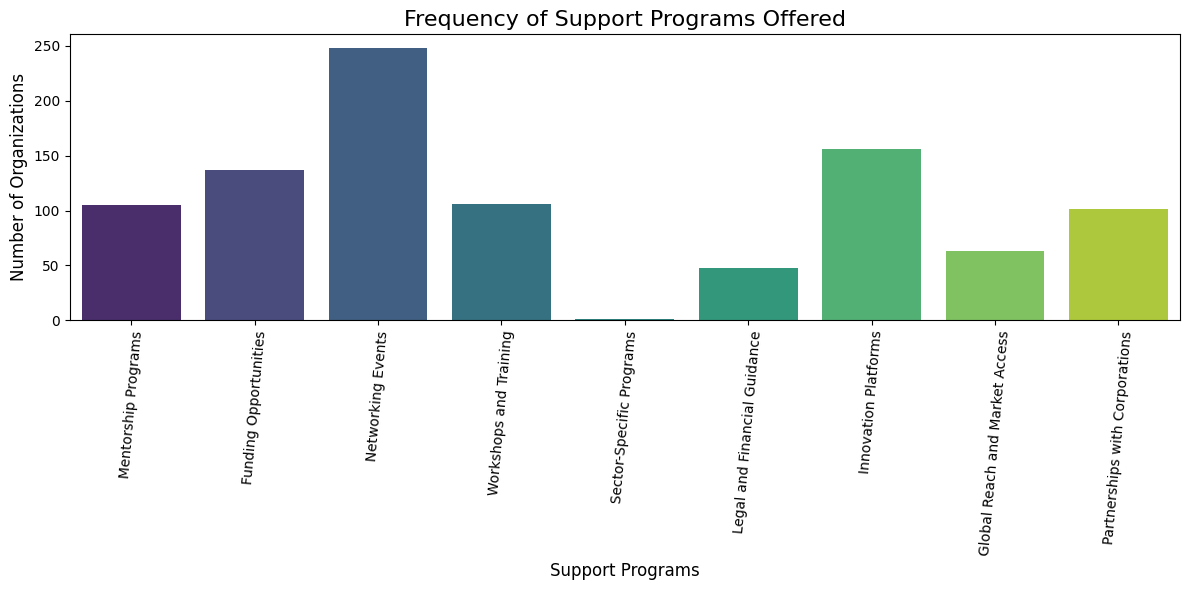

In [93]:
# Bar plot for support program counts
plt.figure(figsize=(12, 6))
sns.barplot(x=support_counts.index, y=support_counts.values, palette="viridis")
plt.title("Frequency of Support Programs Offered", fontsize=16)
plt.ylabel("Number of Organizations", fontsize=12)
plt.xlabel("Support Programs", fontsize=12)
plt.xticks(rotation=85, fontsize=10)
plt.tight_layout()
plt.show()

### Trend Analysis

1. High Prevalence of Networking Events: 
Networking is a key offering among incubators, likely because connections and relationships are crucial for startups and small businesses. Emphasizes the importance of building professional networks as a primary form of support.

2. Innovation Platforms Are Prominent: 
A significant number of incubators focus on providing platforms for innovation, which may include tools, spaces, or opportunities for startups to experiment and develop new ideas.
This highlights a strong push toward fostering creativity and technological advancement.

3. Funding Opportunities: 
Funding support is a common but not universal feature, reflecting that while financial assistance is important, it may not be the sole focus for many incubators.
Some organizations may prioritize other types of support over direct funding.

4. Mentorship Programs:
Mentorship is widely valued, indicating a focus on guidance and expertise transfer, which is critical for helping startups navigate challenges. This also reflects the reliance on experienced professionals to help founders succeed.

5. Moderate Levels of Partnerships with Corporations and Workshops/Training: 
These numbers show a balanced emphasis on forming partnerships with established corporations and providing structured training opportunities.Partnerships may create pathways to resources, expertise, or market access, while training focuses on skill-building.

6. Limited Sector-Specific Programs:
Very few incubators cater to specific sectors, indicating a preference for generalist approaches that can accommodate diverse industries.This might suggest a gap in sector-specific support for startups, potentially leaving niche markets underserved.

7. Legal and Financial Guidance:
The relatively low count suggests that legal and financial advisory services are not a primary focus for most incubators. Startups may need to seek this support elsewhere, such as from specialized firms or consultants.

8. Global Reach and Market Access:
A small but notable number of incubators provide support for accessing international markets, highlighting an area for potential growth. This feature could appeal to startups with ambitions for global expansion.


### General Obeservations

1. Focus on Interpersonal and Creative Support:

The high counts for networking, innovation platforms, and mentorship suggest that incubators prioritize collaborative and idea-driven support systems.


2. Opportunities for Growth in Underserved Areas:

Low counts for sector-specific programs, legal guidance, and global market access point to areas where more targeted or specialized support could be developed.


3. Balanced Approach to Training and Corporate Collaboration:

Moderate counts in workshops and partnerships reflect a balance between developing entrepreneurial skills and leveraging established entities for growth.
These trends indicate that incubators prioritize community-building, innovation, and financial assistance while leaving room for improvement in offering specialized and legal/market-specific services.

In [94]:
# 2. Multi-service organizations

incubators_df['Total Services Offered'] = incubators_df[support_columns].apply(lambda x: x.str.strip().str.lower().eq('yes').sum(), axis=1)
multi_service_counts = incubators_df['Total Services Offered'].value_counts().sort_index()
multi_service_counts


0    90
1    66
2    71
3    68
4    47
5    42
6    21
7     3
8     1
Name: Total Services Offered, dtype: int64

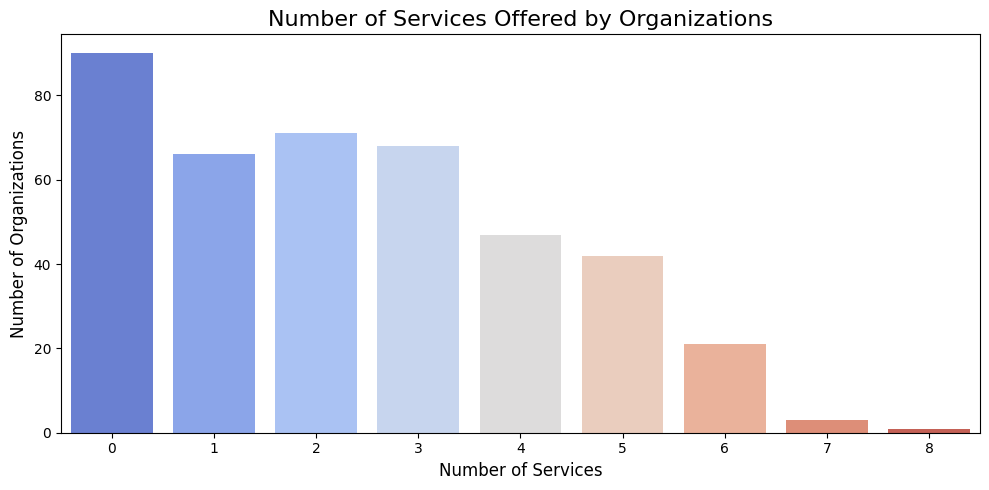

In [95]:
# Bar plot for number of services offered
plt.figure(figsize=(10, 5))
sns.barplot(x=multi_service_counts.index, y=multi_service_counts.values, palette="coolwarm")
plt.title("Number of Services Offered by Organizations", fontsize=16)
plt.xlabel("Number of Services", fontsize=12)
plt.ylabel("Number of Organizations", fontsize=12)
plt.tight_layout()
plt.show()


### Key Observations:

1. Majority are Specialized or Non-Operational:

The highest counts (0–2 services) suggest that many incubators are either dormant, narrowly focused, or simply do not offer the full spectrum of support programs.

2. Gap in Comprehensive Support:

The steep decline in the number of incubators offering 5+ services shows that comprehensive incubators are rare. This gap may leave startups requiring diverse resources underserved.

3. Possible Misclassification:

The high number of incubators with 0 services (90) could imply:
Misclassification of entities as incubators.
Outdated or unavailable information on their offerings.

4. Specialization Over Generalization:

The concentration around 1–3 services suggests a strategic choice to focus on a few core strengths rather than spreading resources across multiple areas.


### Opportunities for Development:

1. Support for Comprehensive Incubators:

Kukumba may indeed want to expand their service offerings to cater to startups needing more holistic support.


2. Sector-Specific Programs:

Given the limited comprehensive services, there’s room for targeted sector-specific programs, which could benefit underserved industries.

4. Collaboration Among Incubators:

Specialized incubators could partner with others to provide startups with access to complementary services without duplicating efforts.

This distribution reflects a landscape where incubators either specialize narrowly or lack resources to offer broader support. It highlights the need for resource-sharing and capacity-building to fill the gaps.

In [96]:
# Comprehensive support systems
comprehensive_support_count = (incubators_df['Total Services Offered'] == len(support_columns)).sum()
print(f"Number of organizations offering all services: {comprehensive_support_count}")

Number of organizations offering all services: 0


In [97]:
#Missing data analysis
missing_data = (incubators_df[support_columns] == 'No').sum().sort_values(ascending=False)
missing_data

Sector-Specific Programs          408
Legal and Financial Guidance      361
Global Reach and Market Access    346
Partnerships with Corporations    308
Mentorship Programs               304
Workshops and Training            303
Funding Opportunities             272
Innovation Platforms              253
Networking Events                 161
dtype: int64

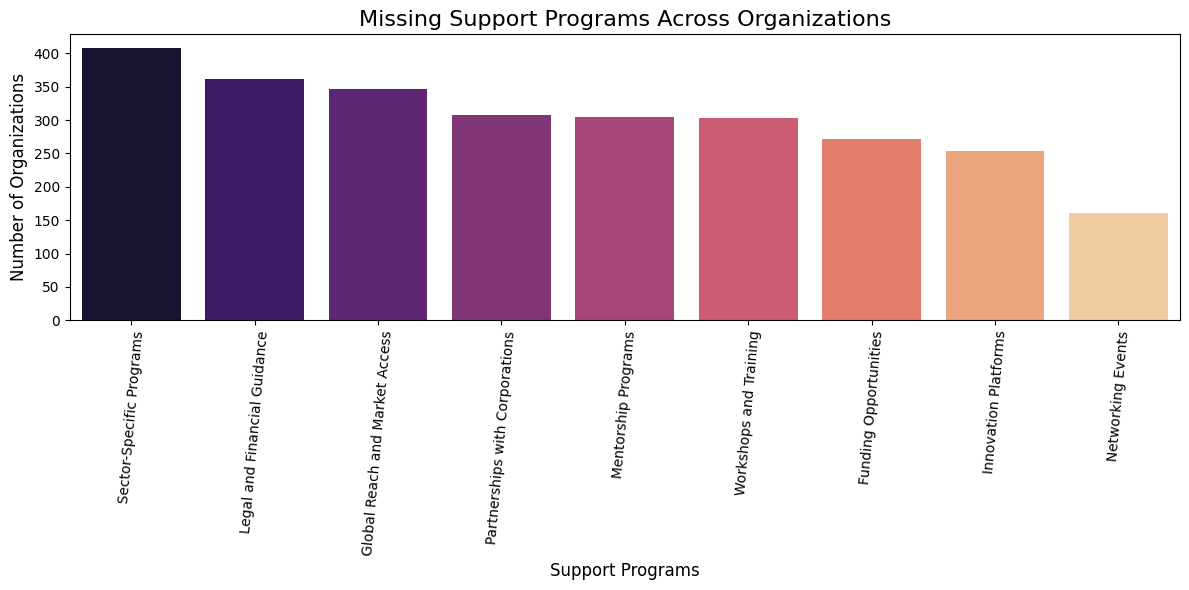

In [98]:
# Bar plot for missing data
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="magma")
plt.title("Missing Support Programs Across Organizations", fontsize=16)
plt.ylabel("Number of Organizations", fontsize=12)
plt.xlabel("Support Programs", fontsize=12)
plt.xticks(rotation=85, fontsize=10)
plt.tight_layout()
plt.show()

In [99]:
# Binary Encoding for "Yes"/"No" columns
incubators_df[support_columns]= incubators_df[support_columns].replace({"Yes": 1, "No": 0})

# Correlation between services
correlation_matrix = incubators_df[support_columns].corr()
correlation_matrix

,Mentorship Programs,Funding Opportunities,Networking Events,Workshops and Training,Sector-Specific Programs,Legal and Financial Guidance,Innovation Platforms,Global Reach and Market Access,Partnerships with Corporations
Mentorship Programs,1.000000,0.282586,0.210027,0.316626,-0.029096,0.046560,0.195329,0.043825,0.195612
Funding Opportunities,0.282586,1.000000,0.147694,0.076773,-0.035135,0.207982,0.263910,0.213785,0.338384
Networking Events,0.210027,0.147694,1.000000,0.225296,0.039889,0.060562,0.292690,0.177447,0.229293
Workshops and Training,0.316626,0.076773,0.225296,1.000000,-0.029282,0.096392,0.155882,0.118596,0.204752
Sector-Specific Programs,-0.029096,-0.035135,0.039889,-0.029282,1.000000,-0.018052,0.063048,-0.021125,-0.028350
Legal and Financial Guidance,0.046560,0.207982,0.060562,0.096392,-0.018052,1.000000,0.151578,0.139028,0.143514
Innovation Platforms,0.195329,0.263910,0.292690,0.155882,0.063048,0.151578,1.000000,0.236642,0.332396
Global Reach and Market Access,0.043825,0.213785,0.177447,0.118596,-0.021125,0.139028,0.236642,1.000000,0.273961
Partnerships with Corporations,0.195612,0.338384,0.229293,0.204752,-0.028350,0.143514,0.332396,0.273961,1.000000


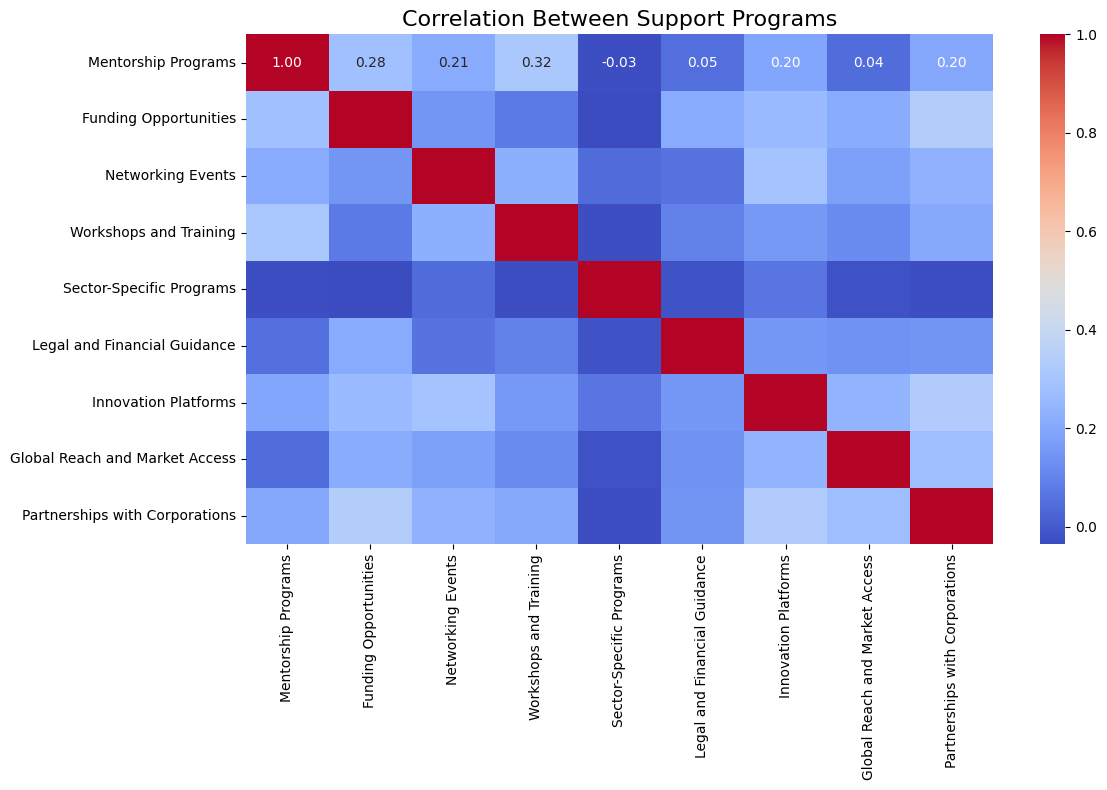

In [81]:
# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",  fmt=".2f", cbar=True)
plt.title("Correlation Between Support Programs", fontsize=16)
plt.tight_layout()
plt.show()

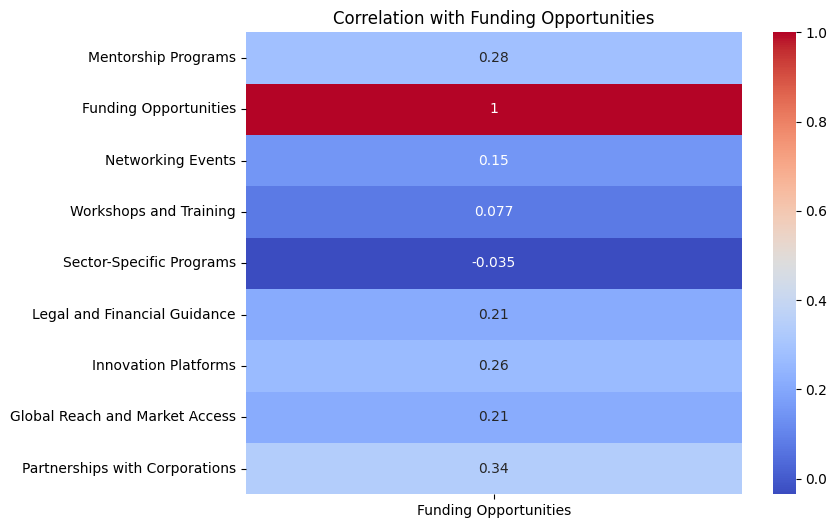

In [100]:
# Focus on correlations to 'Funding Opportunities'
corr_with_funding =correlation_matrix[['Funding Opportunities']]

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_funding, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation with Funding Opportunities")
plt.show()

### Observations:
1. Strongest Positive Correlation:
"Partnerships with Corporations" (0.34) shows the strongest positive relationship with "Funding Opportunities." This suggests that organizations offering funding are often associated with corporate partnerships.

2. Moderate Correlations:
"Mentorship Programs" (0.28), "Innovation Platforms" (0.26), and "Legal and Financial Guidance" (0.21) indicate that these services are moderately linked to funding opportunities.

3. Weak Correlations:
"Networking Events" (0.15) and "Workshops and Training" (0.077) have weaker relationships with funding, implying that while they may coexist, they aren't strongly tied to funding provisions.

4. Negative Correlation:
"Sector-Specific Programs" (-0.035) indicates a slight inverse relationship. This might mean that incubators focusing on sector-specific services are less likely to prioritize funding opportunities.

## Key Insights for Strategy for Kukumba Tribe

### Focus on Partnerships with Corporations:
Since "Partnerships with Corporations" shows the strongest correlation with "Funding Opportunities," consider how partnerships contribute to funding success.
#### Actionable Steps:
Develop programs that foster corporate collaboration, such as co-branded initiatives or pitch events with corporations.

### Leverage Mentorship Programs and Innovation Platforms:
Moderate correlations suggest that mentorship and innovation are important support systems for funding.
#### Actionable Steps:
Expand access to experienced mentors, especially those with strong networks in funding.

### Strengthen Legal and Financial Guidance:
Providing comprehensive guidance could further encourage funding access.
#### Actionable Steps:
Partner with legal experts and financial advisors to offer training or free consultations.
Create templates and resources for funding applications.

### Address Weak Areas:
Networking Events and Workshops and Training have weaker correlations. While valuable, their direct impact on funding is less pronounced.
#### Actionable Steps:
Enhance networking events by inviting potential investors.

### Investigate Sector-Specific Programs: is Kukumba sector specific?
The negative correlation with "Sector-Specific Programs" may indicate that sector-specific incubators are less flexible or accessible for general funding.
#### Actionable Steps:
Explore whether sector-specific programs offer funding targeted to niche industries.
Consider integrating broader funding opportunities into sector-specific incubators.
